<a href="https://colab.research.google.com/github/mrahma15/MyRepos/blob/main/Homework%200_problem%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [2]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Google Colab data/Homework 0/Persian_Cat.jpg.jpg')

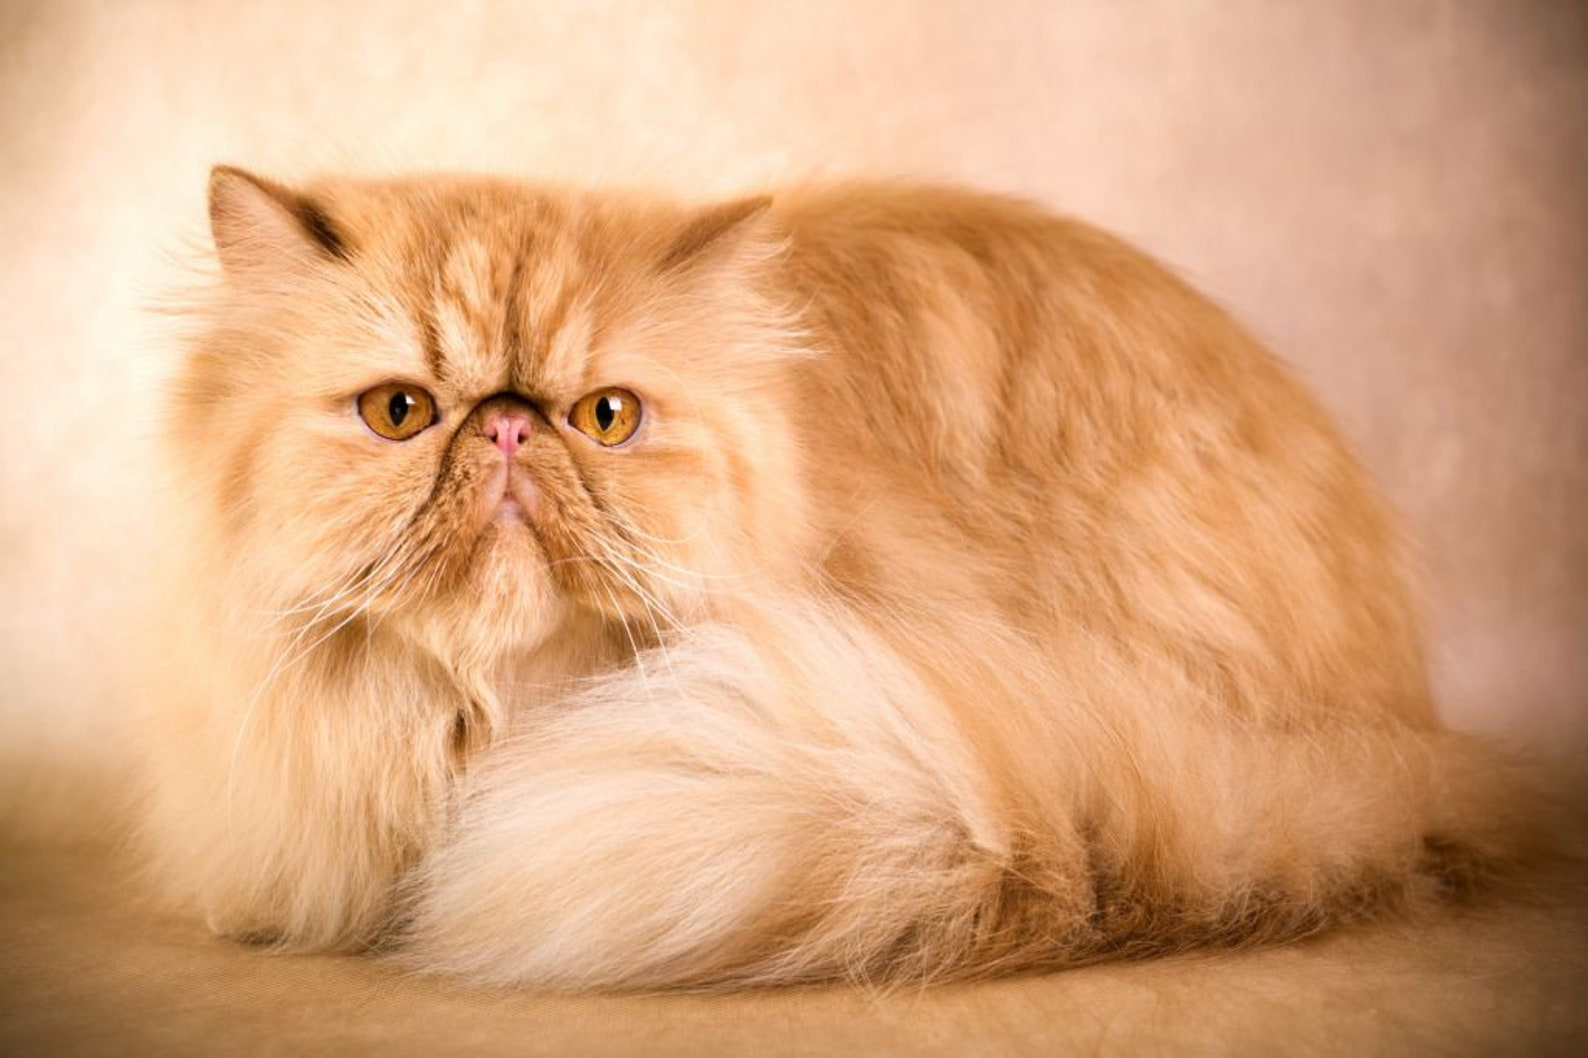

In [3]:
img

In [4]:
# sample execution (requires torchvision)
from torchvision import transforms
input_image = Image.open('/content/drive/MyDrive/Google Colab data/Homework 0/Persian_Cat.jpg.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-4.1411e+00, -2.0339e+00, -3.6444e+00, -4.4681e+00, -3.7682e+00,
        -1.4015e+00, -2.7792e+00, -1.7571e+00,  1.1554e-01, -1.3163e-01,
        -2.2588e+00, -3.0996e+00,  1.6161e+00, -2.5650e+00, -6.1146e+00,
        -2.3390e+00,  5.8385e-02, -1.6401e+00, -3.5566e+00, -4.7971e+00,
        -4.2832e+00,  1.9621e+00,  1.4240e+00,  6.7016e-01,  2.8243e+00,
        -2.2277e+00, -3.5373e+00, -1.8818e+00, -2.1142e+00, -5.2763e+00,
        -5.8292e-01, -3.6284e+00, -1.8096e+00, -2.1026e+00, -2.3547e+00,
        -2.1908e-01, -4.9947e-01, -1.0515e+00,  1.9415e+00, -3.8709e+00,
        -3.8112e+00, -1.7006e+00, -5.3848e+00, -2.9145e+00, -6.3573e-01,
        -9.9739e-01, -3.1458e+00, -2.5669e+00, -4.9177e+00, -2.0333e+00,
        -1.3365e+00, -2.3950e+00,  1.9465e+00,  2.9002e+00,  1.1328e+00,
        -2.2193e+00,  1.6740e-01, -4.0061e-02,  1.6388e+00,  5.4279e-01,
         4.5107e+00, -7.8359e-01,  1.5534e+00,  2.1955e+00, -1.7018e+00,
        -8.1898e-01,  1.2164e+00,  2.5354e+00,  2.1

In [5]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-01-27 10:48:07--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-01-27 10:48:07 (43.3 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [6]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Persian cat 0.999251663684845
Pekinese 0.00032730845850892365
lynx 0.00011095200170530006
Lhasa 4.1379782487638295e-05
lion 3.535140058374964e-05


In [7]:
pip install ptflops

  Created wheel for ptflops: filename=ptflops-0.6.8-py3-none-any.whl size=11871 sha256=3fbef1c6b25114bde7c124bcf962909cdb783c8bcac1619e61313fea96b86747
  Stored in directory: /root/.cache/pip/wheels/7c/ae/5f/74bef440471072ff2e39101cc9565460bfc17804f072bd7cff
Successfully built ptflops


In [8]:
from ptflops import get_model_complexity_info
import torchvision.models as models

with torch.cuda.device(0):
  net = model
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Model size: ', params))

MobileNetV2(
  3.505 M, 100.000% Params, 0.32 GMac, 100.000% MACs, 
  (features): Sequential(
    2.224 M, 63.451% Params, 0.319 GMac, 99.600% MACs, 
    (0): ConvBNActivation(
      0.001 M, 0.026% Params, 0.012 GMac, 3.760% MACs, 
      (0): Conv2d(0.001 M, 0.025% Params, 0.011 GMac, 3.384% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(0.0 M, 0.002% Params, 0.001 GMac, 0.251% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(0.0 M, 0.000% Params, 0.0 GMac, 0.125% MACs, inplace=True)
    )
    (1): InvertedResidual(
      0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
      (conv): Sequential(
        0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
        (0): ConvBNActivation(
          0.0 M, 0.010% Params, 0.005 GMac, 1.504% MACs, 
          (0): Conv2d(0.0 M, 0.008% Params, 0.004 GMac, 1.128% MACs, 32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
   